## Final Project Submission

Please fill out:
* Student name: Wairimu Mundia
* Student pace: Hybrid student
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


# Project Overview
My task is to action insights  to analyze the movies dataset and guide the course of action to be taken by Microsoft corportion

## Objectives

1. Establish the most popular genre of movies
2. Ascertain the most popular publisher
3. Find the  most popular rating for movies
4. Establish the relationship bwtween production budget and  profit realized from the movies

## Business Understanding

Microsoft Studios, with its focus on data-driven content creation and innovative storytelling methods, has the potential to become a major player in the entertainment industry. By leveraging its technological expertise and global reach, Microsoft can create engaging and high-quality content that resonates with audiences worldwide.

# Data Understanding

Instead of directly diving into the data, I'll begin by securing the essential tools for data exploration. These tools include Pandas for data management, NumPy for numerical operations, and potentially Sqlite3 for interacting with relational databases.


In [2]:
import pandas as pd
import sqlite3
import numpy as np
import warnings

ModuleNotFoundError: No module named 'pandas'

Next, I start by establishing a connection to the database and examining the available tables to familiarize myself with the datasets.




## im.db

In [ ]:

conn = sqlite3.connect('im.db') # Establishing connection to the database
data = pd.read_sql_query('SELECT name from sqlite_master where type= "table";',conn) # Viewing the tables in the database
data

,name


 ## bom.movie_gross.csv

In [ ]:
bomovies_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz") # reading the database
bomovies_df.head(2) # viewing the first two entries

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [ ]:
bomovies_df.info() # getting to know the number of entiries and columns and the datatypes of the coulumns

## rt.movie_info.tsv.gz"

In [ ]:
rt_df = pd.read_csv(("zippedData/rt.movie_info.tsv.gz"),delimiter = "\t") # reading the tsv data and assigning it to rt_df.
rt_df.head(3) #viewing the first three entries

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [ ]:
rt_df.info() #getting to know the number of rows and columns and the datatypes of the coulumns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## rt.reviews.tsv.gz

In [ ]:
# reading the data and assigning it to rv_df

rv_df = pd.read_csv(("zippedData/rt.reviews.tsv.gz"), delimiter = "\t", encoding = "Windows 1252") 

rv_df.tail(3) # viewing the last 3 entries

,id,review,rating,fresh,critic,top_critic,publisher,date
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [ ]:
rv_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   fresh       33988 non-null  object
 3   critic      33988 non-null  object
 4   top_critic  33988 non-null  int64 
 5   publisher   33988 non-null  object
 6   date        33988 non-null  object
 7   score       33988 non-null  object
 8   outof       27588 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


## tmdb.movies.csv.gz

In [ ]:
tmbd_df = pd.read_csv("zippedData/tmdb.movies.csv.gz") # Reading the tmdb data

tmbd_df.head(2) # viewing the first two entries

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [ ]:
tmbd_df.info()

## tn.movie_budgets.csv.gz

In [ ]:
budgets= pd.read_csv("zippedData/tn.movie_budgets.csv.gz") 
budgets.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [ ]:
budgets.info()

# Data Preparation

After having a brief overview of the dataset, I started the data prepaation process  which invloved cleaning of the data with he following objectives:

1. Deal with the NaNs/ or missing data
2. Ensure that all columns are in the correct datatype
3. Deal with placeholders if any

In the cells taht follow i will conduct data cleaning and ETL  for each of the dataset.

## bomovies_df


#### Dealing with missing Values

The first step is to find the proportion of missing  values in each of the  columns of the bomovies_df

In [ ]:
bomovies_df.isnull().mean()*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

From the results above, it seems that in the bomovies_df the proportion of missing values for all the columns except the foreign_gross is quite low at less than 1%. 

However for foreign gross, the missing value percentage  is almost 40%.
I assumed that the missing values in foreign_gross means that the movies were sold domestically and did not reach the international market hence their revenue from the international market is 0. Therefore,  I replace the missing values in the foreign_gross column by 0.
 
I also replaced missing values in domestic_gross column with zero since i assummed that these movies  did not sell  in the domestic market

The codes below  replaces the Nans  with 0 in the columns domestic_gross and foreign_gross respectively.


In [ ]:
bomovies_df["domestic_gross"].fillna(0, inplace= True) # replaces all NANs in the domestic_gross columns with 0
bomovies_df["foreign_gross"].fillna(0, inplace= True) # replaces all NANs in the foreign_gross columns with 0

In [ ]:
bomovies_df.isna().mean() # Check if the Nulls have disappeared.


title             0.000000
studio            0.001476
domestic_gross    0.000000
foreign_gross     0.000000
year              0.000000
dtype: float64

For the  studio column I replaced the missing values with the mode, which is the most occuring studio. 

To find the most occuring studio I used the following code:

In [ ]:
bomovies_df["studio"].value_counts().nlargest(1) # Checking for the most common studio

IFC    166
Name: studio, dtype: int64

Since IFC is the most common studio, i replaced the missing values in the studio column with it

In [ ]:
bomovies_df["studio"].fillna("IFC",inplace=True) # replacing missing values in studio column with IFC.
bomovies_df.isna().mean() # checking if the nulls have disappeared

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

I have now dealt with the missing values in the bomovies_df succesfully. 

#### Converting to the appropriate column datatypes
However, i I realized domestic-gross and foreign gross and year are in the  wrong datatype  and  therefore i cast them to the correct datatype

In [ ]:
bomovies_df = bomovies_df = bomovies_df.astype({"domestic_gross": int})


In [ ]:
bomovies_df.info() # checking column dataypes have converted succesfull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           3387 non-null   object
 1   studio          3387 non-null   object
 2   domestic_gross  3387 non-null   int32 
 3   foreign_gross   3387 non-null   object
 4   year            3387 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 119.2+ KB


## rt_df

#### Dealing with missing values in rt_df

In [ ]:
rt_df.isna().mean()*100 # First find the proportion of missing  values in rt_df

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

#### Dealing with the nulls;
 In the dataframe rt_df,  i realized that only to columns would be important for my analysis. These are the genre and rating columns.
 I sliced them from the main datframe as follows:


In [ ]:
rt_df = rt_df[["genre", "rating"]] # to  slice relevant columns from the rt_df dataframe
rt_df.head(2)

,genre,rating
0,Action and Adventure|Classics|Drama,R
1,Drama|Science Fiction and Fantasy,R


I then dealt with the missing values by droppping the rows that had missing values in the column

In [ ]:
rt_df = rt_df.dropna()

In [ ]:
rt_df.isna().mean()*100

genre     0.0
rating    0.0
dtype: float64

## rv_df

#### Deal with the  missing values by  dropping all null vlaues in the rows

In [ ]:
rv_df.dropna(inplace =True) # dropping rows with missing values

In [ ]:
rv_df.isnull().mean()*100 # checking if the nulls have disappeared.

id            0.0
review        0.0
rating        0.0
fresh         0.0
critic        0.0
top_critic    0.0
publisher     0.0
date          0.0
dtype: float64

The ratings column in the rt_reviews (rv_df) can be split into two columns so that we can be able to standardize ratings of all the enries throough feature engineering. The next cell splits the rating column ito two and displays them as separate columns 



In [ ]:
new = rv_df["rating"].str.split(pat ="/", n = 1, expand=True) # splitting the ratin
rv_df["score"] = new[0]
rv_df["outof"] = new[1]
rv_df.drop(columns = ["rating"], inplace = True)
rv_df

,id,review,fresh,critic,top_critic,publisher,date,score,outof
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5
6,3,"Quickly grows repetitive and tiresome, meander...",rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",C,None
7,3,Cronenberg is not a director to be daunted by ...,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2,5
11,3,"While not one of Cronenberg's stronger films, ...",fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013",B-,None
12,3,Robert Pattinson works mighty hard to make Cos...,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2,4
...,...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",fresh,Gene Seymour,1,Newsday,"September 27, 2002",2.5,4
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,fresh,Megan Turner,1,New York Post,"September 27, 2002",3,4
54421,2000,"Manages to be somewhat well-acted, not badly a...",rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002",1.5,4
54422,2000,Arguably the best script that Besson has writt...,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002",3.5,5


Before I standardize the ratings, i willl first convert the column types from  string to integer to allow for mathematical computation.

## tmbd_df

#### Check fo missing values

In [ ]:
tmbd_df.isna().mean()*100 # checking proportion of missing values

Unnamed: 0           0.0
genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

Perfect! This data has no any missing value.

In [ ]:
tmbd_df["genre_ids"].value_counts() # check for  unique values of Genre_ids

[99]                       3700
[]                         2479
[18]                       2268
[35]                       1660
[27]                       1145
                           ... 
[37, 12]                      1
[10752, 878]                  1
[28, 53, 10749, 18, 35]       1
[99, 80, 53, 36]              1
[10751, 12, 28]               1
Name: genre_ids, Length: 2477, dtype: int64

## budgets_df

Check for missing values

In [ ]:
budgets.isna().mean()*100  #checks for percentage of missing values. 

The budgets_df is also complete!

Since the "domestic_gross," "Production_budget," and "Worldwide_gross" columns are in string format, we need to transform them into integers to enable feature engineering for enhanced data insights.

In [ ]:
#The codes below convert  the columns with the $ sign into interger to facilitate feature engineering 

budgets['domestic_gross'] = budgets['domestic_gross'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
budgets['production_budget'] = budgets['production_budget'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
budgets["worldwide_gross"] = budgets['worldwide_gross'].apply(lambda x: int(''.join(filter(str.isdigit, x))))


Absolutely! By subtracting the production cost from the gross revenue, we can calculate the profit for each movie. This new profit column will provide valuable insights into the financial performance of each film. Let's proceed with creating this new column.

In [ ]:
budgets["Domestic_profit"] = budgets["domestic_gross"]- budgets["production_budget"]  # creates a new column Domestic_profit


In [ ]:
budgets["worldwide_profit"] = budgets["worldwide_gross"]-budgets["production_budget"]
budgets.info()  # checkig if  we have the correct datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   Domestic_profit    5782 non-null   int64 
 7   worldwide_profit   5782 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 361.5+ KB


# Data Analysis

After ensuring the data is clean and well-prepared, I transitioned into data analysis. In this phase, I aim to extract meaningful insights from the data. I will merge datasets to uncover deeper analyses and craft a compelling narrative that Microsoft would undoubtedly be interested in.

 My Data  Analysis will focus on Establishing the  following:
 
 1. Which is the  most popular genre of movies
 2. Which is the most popular studio 
 3. Which rating  is most prefered
 4. wh
 

### Most popular Genre of Movies 


From the rt_ movies dataset I can establish the  top 5 genres of movies

In [ ]:
rt_df.genre.value_counts().nlargest(5) 

Drama                                151
Comedy                               110
Comedy|Drama                          80
Drama|Mystery and Suspense            67
Art House and International|Drama     62
Name: genre, dtype: int64

Based on the analysis conducted, it is evident that the movie genre with the highest popularity is Drama, closely followed by Comedy and Comedy-Drama. Subsequently, the remaining genres  follow suit in descending order of popularity. This visualization effectively showcases the hierarchy of movie genres, providing valuable insights into audience preference.

In [ ]:

import matplotlib.pyplot as plt # Importing the library neccesaty to create visualizations
%matplotlib inline
import seaborn as sns


In [ ]:
# Getting the X and Y  values 
x = rt_df["genre"].value_counts().head().index.tolist()
y = list(rt_df["genre"].value_counts().nlargest(5))   



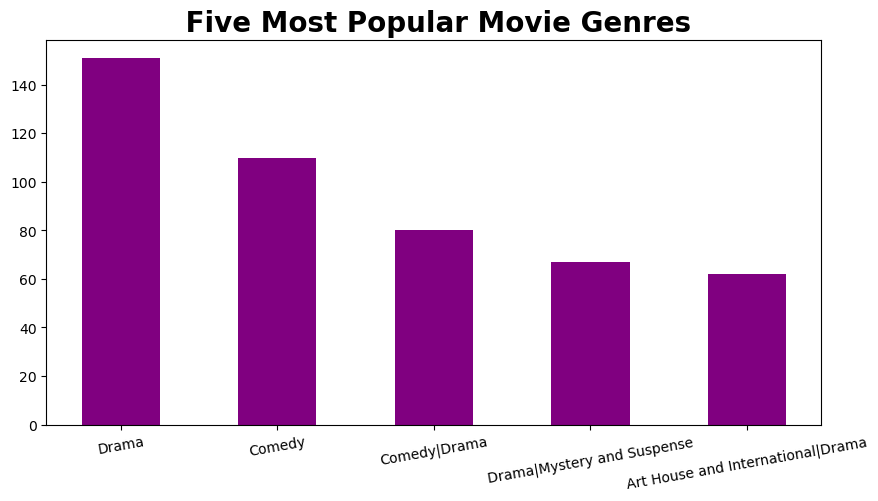

In [ ]:
# Ploting  Most popular  Genres and their frequencies
fig,ax = plt.subplots(figsize = (10,5))
plt.bar(x, y, color = "Purple", width = 0.5)
plt.xticks(rotation = 10);
plt.title(" Five Most Popular Movie Genres", fontsize = 20, fontweight = "bold");

### Most Popular studio


I can determine the most prominent studio from the 'bomovies_df'.

In [ ]:
rt_df["rating"].value_counts()

These can be visually presented as:

In [ ]:
rating= rt_df["rating"].value_counts().head().index.tolist()
frequency=list(rt_df["rating"].value_counts().nlargest(5))

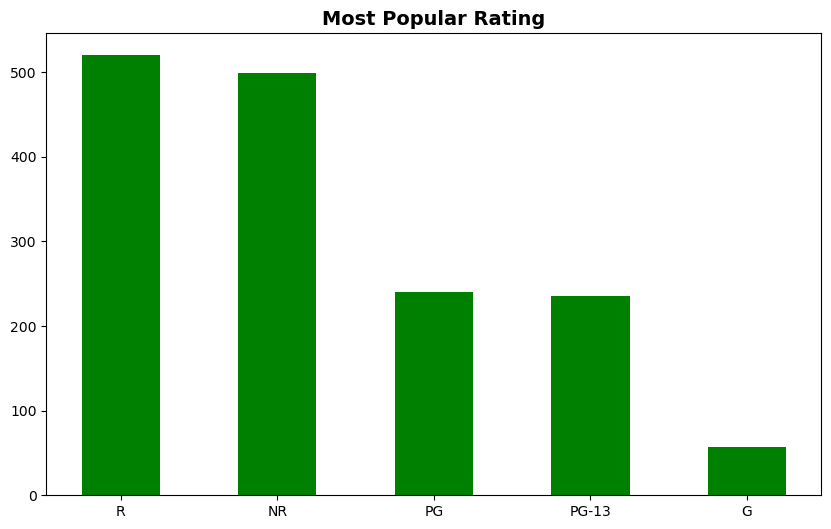

In [ ]:
fig, ax = plt.subplots(figsize= (10,6))
                       
plt.bar(rating, frequency, color = "green", width =0.5); # plotting ratings and their frequencies.

plt.title("Most Popular Rating", fontsize = 14, fontweight = "bold");


## Top Most Rated Movies

Is There a Correlation Between Movie Production Budget and Profits Generated?

To determine whether the production budget impacts profitability, I computed the correlation between the production budget and the domestically and worldwide realized profits.

In [ ]:
budgets.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_10264\2354375143.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  budgets.corr()


,id,production_budget,domestic_gross,worldwide_gross,Domestic_profit,worldwide_profit
id,1.000000,-0.035278,0.008255,-0.009422,0.040832,-0.001172
production_budget,-0.035278,1.000000,0.685682,0.748306,0.099742,0.608752
domestic_gross,0.008255,0.685682,1.000000,0.938853,0.792663,0.926605
worldwide_gross,-0.009422,0.748306,0.938853,1.000000,0.656626,0.981811
Domestic_profit,0.040832,0.099742,0.792663,0.656626,1.000000,0.756767
worldwide_profit,-0.001172,0.608752,0.926605,0.981811,0.756767,1.000000


In the correlation matrix provided, the correlation coefficient between the production budget and worldwide profit is positive and higher than the correlation coefficient between the production budget and domestic profit. Below is a scatter plot illustrating this relationship.

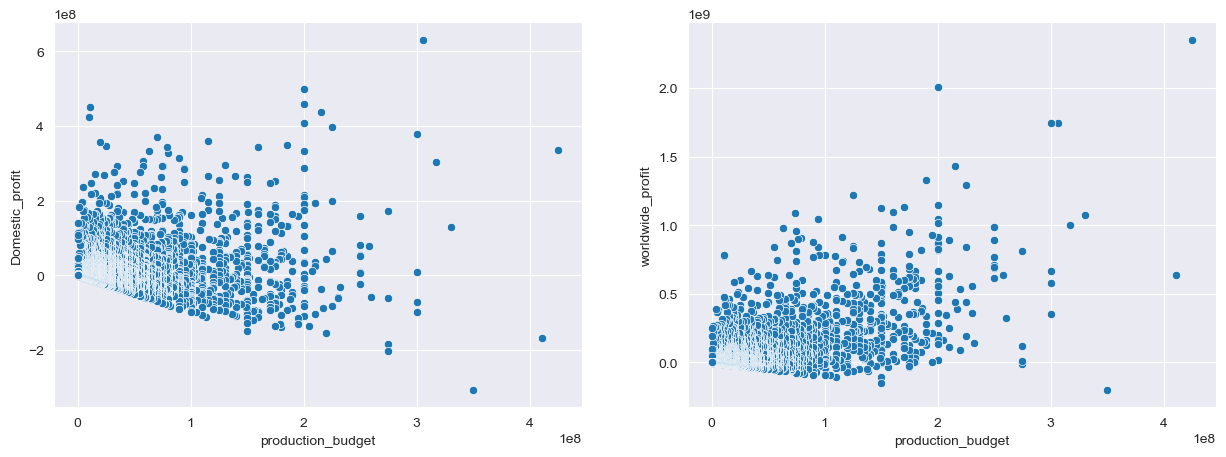

In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2,figsize= (15,5))
sns.scatterplot(x= budgets["production_budget"], y =budgets["Domestic_profit"], data = budgets, ax= axes[0])
sns.scatterplot(x= budgets["production_budget"], y =budgets["worldwide_profit"], data = budgets, ax= axes[1]); # plotting scatter plots  between prodcution_budget and profits



In [ ]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(1,2,figsize= (15,5))
sns.scatterplot(x= budgets["production_budget"], y =budgets["domestic_gross"], data = budgets, ax= axes[0])
sns.scatterplot(x= budgets["production_budget"], y =budgets["worldwide_gross"], data = budgets, ax= axes[1]);



### Most Popular  Genre_ids

In [ ]:
# grouping by genre-ids and aggregating by max()

grouped1= tmbd_df.groupby(["genre_ids"]).max().sort_values(by="popularity", ascending= False)
grouped1.head()


,Unnamed: 0,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
genre_ids,,,,,,,,,
"[12, 28, 14]",24034,522417,zh,奇门遁甲,80.773,2018-10-23,The Thousand Faces of Dunjia,8.3,13948
"[28, 53]",26399,569869,th,우는 남자,78.123,2018-12-20,Your Move,7.4,10081
"[28, 12, 16, 878, 35]",23812,324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
"[28, 12, 14]",24318,525135,zh,西游记之孙悟空三打白骨精,53.783,2018-12-21,Warcraft,7.3,11991
"[878, 28, 12]",24924,521323,en,Wastelander,50.289,2018-02-02,Wastelander,8.0,19673


### Popularity By Language

In [ ]:
# Grouping by  Original _language
grouped = tmbd_df.groupby(["original_language"]).sum().sort_values(by="popularity", ascending= False) 
grouped.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10264\4174702788.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = tmbd_df.groupby(["original_language"]).sum().sort_values(by="popularity", ascending= False)


,Unnamed: 0,id,popularity,vote_average,vote_count
original_language,,,,,
en,312028215,7005029780,71895.155,138662.0,4874990
fr,5744495,118048030,2155.574,3130.8,75337
ja,3769256,70813222,1513.434,1809.1,54774
es,6070196,127264882,1257.725,2874.3,29396
ru,2859417,64494601,708.220,1579.4,4901


In [ ]:
language =  ["en","fr","ja","es", "ru"]
Popularity= [71896,2155,1513,1257,708]

In [ ]:
grouped["popularity"].head()

original_language
en    71895.155
fr     2155.574
ja     1513.434
es     1257.725
ru      708.220
Name: popularity, dtype: float64

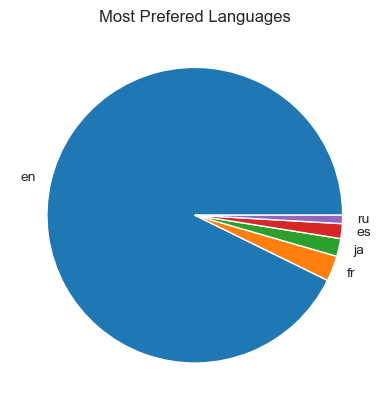

In [ ]:
fig,ax = plt.subplots()
plt.pie(Popularity, labels = language)
plt.title("Most Prefered Languages");


### Merging Datasets

In [ ]:
Merged_df= pd.merge(rv_df, budgets) #Merging datasets with common columns
Merged_df.head()

,id,review,fresh,critic,top_critic,publisher,date,score,outof,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic_profit,worldwide_profit
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
1,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5,"Nov 21, 2018",Ralph Breaks The Internet,175000000,201091711,524283695,26091711,349283695
2,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5,"Apr 8, 2005",Sahara,145000000,68671925,121671925,-76328075,-23328075
3,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5,"Oct 5, 2018",Venom,116000000,213511408,853628605,97511408,737628605
4,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",3,5,"Feb 18, 2005",Son of the Mask,100000000,17018422,59918422,-82981578,-40081578


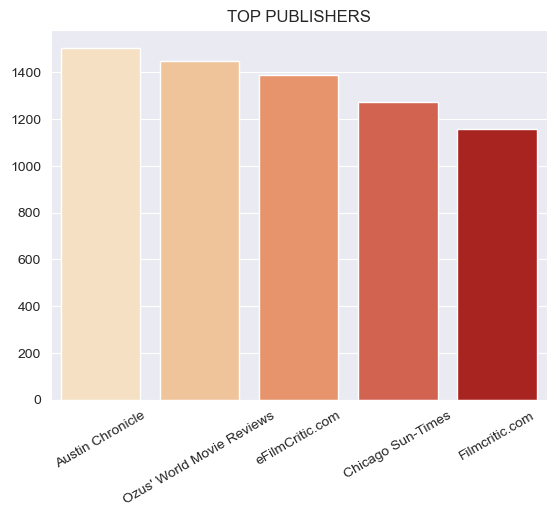

In [ ]:
publisher= Merged_df["publisher"].value_counts().head().index.tolist()
frequncy=list(Merged_df["publisher"].value_counts().nlargest(5))
sns.barplot(x=publisher, y = frequncy, data = Merged_df, palette='OrRd')
plt.xticks(rotation = 30);
plt.title("TOP PUBLISHERS");

###  Summary

The visualizations provided offer valuable insights that will guide Microsoft's journey into movie production. With these insights, Microsoft can make informed decisions and ensure success in their data analysis endeavors.